
**Anomaly Detection Algorithm using Gaussian Mixture Model


##**Part 1: Getting started [1.5 Marks]**

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there? 284807 **[0.1]**
* What features in the dataset are present aside from the 28 main features?  Time and Amount **[0.1]**
* Which column contains the targets? Class 31th column  **[0.1]**
* To what do the target values correspond? Class 0 = non fraud and Class 1 = Fraud **[0.1]**

In [ ]:
!pip install wget
!pip install fast_ml

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=e9b20fdcc29443c2b176ab9776148bd7a599f711968f353360c40d1dfdc218eb
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
     |████████████████████████████████| 42 kB 424 kB/s 


In [ ]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar.gz'

In [ ]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df_w_headers= df.describe()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
### YOUR CODE HERE ###


* What is the percentage of entries in the dataset for each class? **[0.1]** ***Class 0 (non fraudlent) is 99.827 % and Class 1 (fraudlent) is 0.173% ***
* Is this data considered balanced or unbalanced? Why is this the case?**[0.1]**  **Data is imbalanced as there is large gap between two classes. Class 0 (non fraudlent)is about 99.8% whereas Class 1 (fraudlent) merely 0.2% of entire dataset** 
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? _____ **[0.2]**



**Answer: When the data is balanced it is easier to train our model and have higher accuracy in predication. With imbalanced data it is difficult to make accurate prediction even if the accuracy is high as the target class is minimal and we would need high value of K neighbours to predict favourable result. In this case of fraud detection, it is normal to have minimal outliers and an imbalanced data set. So we need to train our model accordingly with parameter other that just accuracy.**

In [ ]:
### YOUR CODE HERE ###

print("Entry for Class 0 is ", format(len(df.loc[df.Class == 0])/len(df.Class)*100,".3f"),"%")
print("Entry for Class 1 is ", format(len(df.loc[df.Class == 1])/len(df.Class)*100,".3f"),"%")

Entry for Class 0 is  99.827 %
Entry for Class 1 is  0.173 %


Next, split the dataset into a training (70%), validation (15%) and testing set (15%). Set the random state to 0. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [ ]:
### Split the data  ###
#X_train, X_val, X_test, y_train, y_val, y_test = 0, 0, 0, 0, 0, 0

from fast_ml.model_development import train_valid_test_split  # add reference link

X_train,y_train, X_val, y_val, X_test, y_test = train_valid_test_split(df, target='Class', 
                                                                            train_size=0.7, valid_size=0.15, test_size=0.15,random_state=0)

#verify shape of data
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(199364, 30) (199364,)
(42721, 30) (42721,)
(42722, 30) (42722,)


In [ ]:
# verify the training data and labels are correct
print(X_train)
print(y_train)
print(X_val)
print(y_val)

            Time        V1        V2  ...       V27       V28  Amount
161145  113921.0 -0.132066  0.107044  ...  0.306395  0.074817   47.89
204520  135319.0  2.125994  0.014207  ... -0.068267 -0.057678    1.98
182659  125498.0 -0.086694  0.166240  ... -1.201571 -1.139931  170.10
25117    33520.0  1.352339 -0.534984  ...  0.013746  0.016152    5.96
227642  145152.0 -1.526760  0.647782  ...  0.065022  0.147294   89.95
...          ...       ...       ...  ...       ...       ...     ...
211543  138459.0 -1.321976  1.138686  ... -0.463125 -0.010589   49.89
86293    61167.0 -0.627810  0.918729  ...  0.145939  0.110400   24.99
122579   76616.0  1.512602 -0.949435  ... -0.001415  0.003665   34.90
152315   97253.0  1.798863 -1.699791  ... -0.033616 -0.032471  171.31
117952   74887.0 -0.589400  0.747828  ...  0.086592  0.118084   15.99

[199364 rows x 30 columns]
161145    0
204520    0
182659    0
25117     0
227642    0
         ..
211543    0
86293     0
122579    0
152315    0
117952    0


[link text](https://)Now, let's take a look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

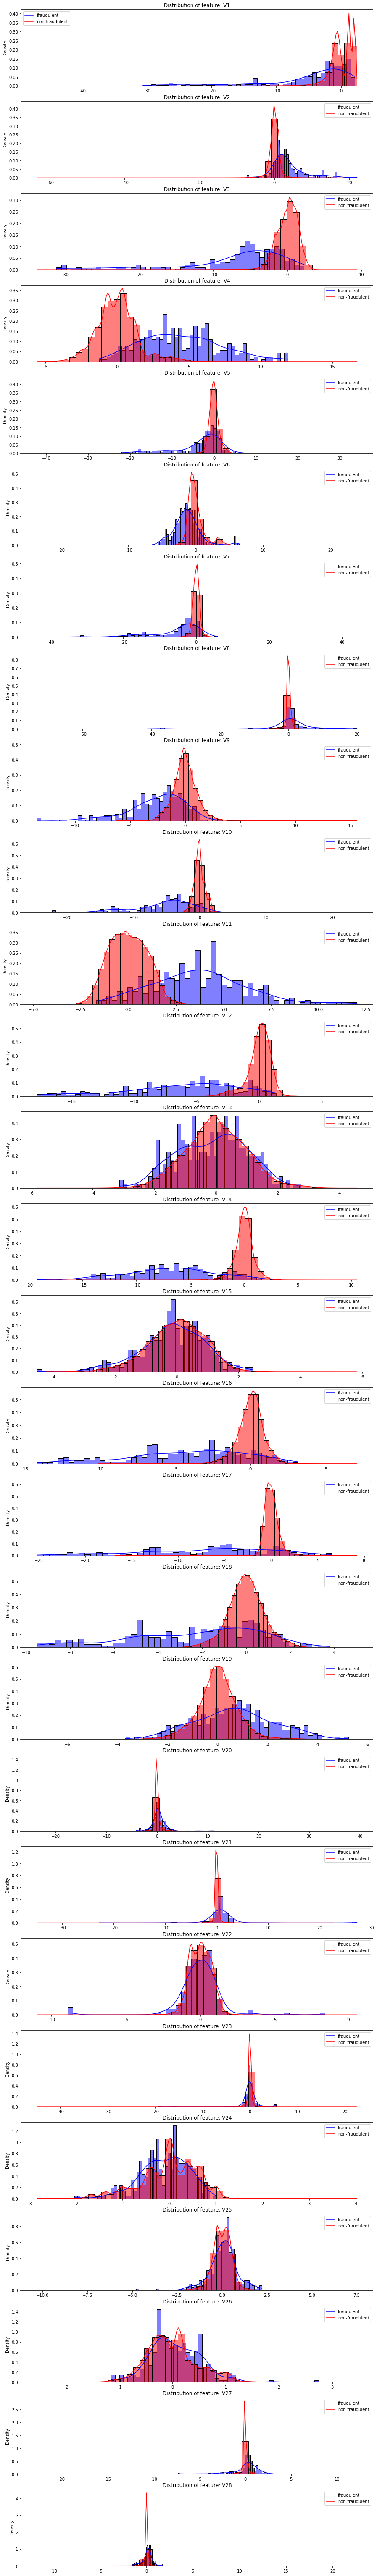

In [ ]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**

***Features for which spread of the data is very close to the mean for fraud and non fradulant data transcation shows an high percentage of over lap. In this situation it is diificult to predict the outliers. This can be seen predominantly in features V1, V2 , V5,V6,V8,V13,V15,V21,V23,V24,V25,V26,V27,and V28.
Using these features might not result in good prediction.  Whereas, other features that have a good spread and least over lap can be detected easliy as outliers and improve our models score.***

## **Part 2: Single feature model with one Gaussian distribution: [2.5 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**. 

Please note that we **only use `V` features** in our model.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. 
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table. 
  4. Find the best 3 features to distinguish fraudulent transactions from non-fraudulent transactions based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.5]**

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a. 
 2. Compute AUC and F1 score when you fit a Gaussian **only on non-fraudulent transactions** (instead of all the transactions).
 3. Compare your results from parts 2a and 2b (AUC and F1 score) in a table. **[0.8]**
 4. Are these results different or similar? Why?**[0.5]**





***Answer 2a. 6 :For calculating optimum threshold we have 
f(x) = O(200 (O (nlogn) + (O(n)))) \
     = O(200nlogn + 200n) \
     = O(nlogn)***


In [ ]:
# loop through field names and populate a dictionary with indices
fields = {}
# cycle through the first row which represents the fields
for i in range(X_train.columns.size):
    fields[X_train.columns[i]] = i

print(fields)

Features_V = np.array([f for f in fields.keys() if 'V' in f])     ## Array with V features
Features_V

{'Time': 0, 'V1': 1, 'V2': 2, 'V3': 3, 'V4': 4, 'V5': 5, 'V6': 6, 'V7': 7, 'V8': 8, 'V9': 9, 'V10': 10, 'V11': 11, 'V12': 12, 'V13': 13, 'V14': 14, 'V15': 15, 'V16': 16, 'V17': 17, 'V18': 18, 'V19': 19, 'V20': 20, 'V21': 21, 'V22': 22, 'V23': 23, 'V24': 24, 'V25': 25, 'V26': 26, 'V27': 27, 'V28': 28, 'Amount': 29}


array(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='<U3')

In [ ]:
##Converting data in np

X_train_np = X_train.to_numpy()
X_val_np = X_val.to_numpy()
y_train_np = y_train.to_numpy()
y_val_np = y_val.to_numpy()

print(X_train_np.shape)
print(y_train_np.shape)
#print(X_val_np)
#print(y_val_np)

(199364, 30)
(199364,)


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

AUC_train = np.zeros((0,0))
AUC_val = np.zeros((0,0))
Feature_index = np.zeros((0,0))

for i in range(len(X_train_np[0,:])):

  X_train_feat = X_train_np[:,i].reshape(-1,1)
  X_val_feat = X_val_np[:,i].reshape(-1,1)

  gm1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
  gm1.fit(X_train_feat)

  c = gm1.score_samples(X_train_feat)
  p_gm = gm1.score_samples(X_val_feat)

  fpr_sc, tpr_sc, _ = roc_curve(y_train_np, 1-c)
  fpr_gm, tpr_gm, _ = roc_curve(y_val_np, 1-p_gm)

  AUC_train=np.append(AUC_train, auc(fpr_sc, tpr_sc))
  AUC_val=np.append(AUC_val, auc(fpr_gm, tpr_gm))
  Feature_index = np.append(Feature_index,i)

Table_1 = pd.DataFrame(data = [fields.keys(),AUC_train,AUC_val]).T
Table_1.columns=['Features','AUC_train','AUC_val']
print('Table with AUC train and AUC validation:')
Table_1

Table with AUC train and AUC validation:


,Features,AUC_train,AUC_val
0,Time,0.510726,0.481849
1,V1,0.705102,0.694811
2,V2,0.837499,0.8378
3,V3,0.876537,0.838364
4,V4,0.892103,0.888283
5,V5,0.771825,0.786857
6,V6,0.73438,0.673559
7,V7,0.862967,0.867423
8,V8,0.773238,0.77413
9,V9,0.802874,0.776739


In [ ]:
Table_2a = Table_1.sort_values(by = ['AUC_val'],ascending=False)  ## Sorted table with highest AUC value ##
print('Top three features with best AUC scores selected from table below : ')
Table_2a

Top three features with best AUC scores selected from table below : 


,Features,AUC_train,AUC_val
14,V14,0.952459,0.938073
10,V10,0.9136,0.905959
4,V4,0.892103,0.888283
16,V16,0.902137,0.882852
11,V11,0.897175,0.882058
17,V17,0.934852,0.881858
7,V7,0.862967,0.867423
3,V3,0.876537,0.838364
12,V12,0.92018,0.837909
2,V2,0.837499,0.8378


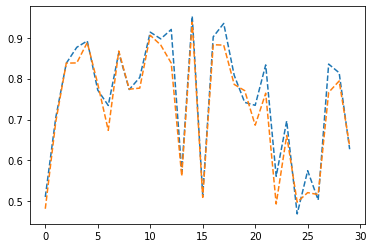

In [ ]:
plt.plot(Feature_index, AUC_train, linestyle = '--', label='AUC train')
plt.plot(Feature_index, AUC_val, linestyle = '--', label='AUC validation')
plt.show()

In [ ]:
## c2a values for 3 features V14, V10 , V4

for i in [14,10,4]:

  X_train_feat_2a = X_train_np[:,i].reshape(-1,1)
  X_val_feat_2a = X_val_np[:,i].reshape(-1,1)

  gm2a = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
  gm2a.fit(X_train_feat_2a)
# c = gm.score_samples(X_train_feat)

  if i == 4 :
    c_4 = gm2a.score_samples(X_val_feat_2a)
    
  if i == 10 :
    c_10 = gm2a.score_samples(X_val_feat_2a)

  if i == 14 :
    c_14 = gm2a.score_samples(X_val_feat_2a)


In [ ]:
## Define feature to calculate f1 score ##

def F1_score_calulator_single_feature(x_train_np, x_val_np, fea_index, y_validation):
  
  X_train_funt = X_train_np[:,fea_index].reshape(-1,1)    ## input train feature 
  X_val_funt = X_val_np[:,fea_index].reshape(-1,1)        ## input val feature
  y_val_funt = y_validation
  
  gm_funt = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
  gm_funt.fit(X_train_funt)
  c_funt = gm_funt.score_samples(X_val_funt)              ## c for validation set
  
## Calculate f1 score ##
  f1_scores_funt = np.zeros((0,0))

  for k in range(1,200):
    tr_funt = sorted(c_funt)[k]
    f1_funt = f1_score(y_val_funt, c_funt<tr_funt)
    f1_scores_funt=np.append(f1_scores_funt,f1_funt)

  f1_scores_funt_max = np.max(f1_scores_funt)
  tr_funt_index = np.argmax(f1_scores_funt)
  tr_funt_max = sorted(c_funt)[tr_funt_index]

  #plt.plot(f1_scores_funt, linestyle = '--', )
  #plt.show() 

  return fea_index, f1_scores_funt_max, tr_funt_max
  


In [ ]:
## F1 scores for V14 feature ##

Ret_2a_1 = F1_score_calulator_single_feature(X_train_np,X_val_np,14,y_val_np)
f1_scores_2a_v14 = Ret_2a_1[1]
tr_v14 = Ret_2a_1[2]
print('For feature V', Ret_2a_1[0], 'maximum F1 score is', Ret_2a_1[1], 'at threshold' , Ret_2a_1[2])

For feature V 14 maximum F1 score is 0.5901639344262295 at threshold -19.698972756843407


In [ ]:
## F1 scores for V10 feature ##

Ret_2a_2 = F1_score_calulator_single_feature(X_train_np,X_val_np,10,y_val_np)
f1_scores_2a_v10 = Ret_2a_2[1]
tr_v10 = Ret_2a_2[2]
print('For feature V', Ret_2a_2[0], 'maximum F1 score is', Ret_2a_2[1], 'at threshold' , Ret_2a_2[2])

For feature V 10 maximum F1 score is 0.2558139534883721 at threshold -58.454523398551025


In [ ]:
## F1 scores for V4 feature ##

Ret_2a_3 = F1_score_calulator_single_feature(X_train_np, X_val_np, 4, y_val_np)
f1_scores_2a_v4 = Ret_2a_3[1]
tr_v4 = Ret_2a_3[2]
print('For feature V', Ret_2a_3[0], 'maximum F1 score is', Ret_2a_3[1], 'at threshold' , Ret_2a_3[2])

For feature V 4 maximum F1 score is 0.3619047619047619 at threshold -11.180412445913472


In [ ]:
##  Part 2b   ##

### Splitting Non fraud and fraud data set Part 2b###

X_nf_train = X_train.loc[df.Class == 0]
y_nf_train = y_train.loc[df.Class == 0]

X_f_train = X_train.loc[df.Class == 1]
y_f_train = y_train.loc[df.Class == 1]

print(X_nf_train.shape)
print(y_nf_train.shape)
print(X_f_train.shape)
print(y_f_train.shape)

(199019, 30)
(199019,)
(345, 30)
(345,)


In [ ]:
## Calculation for AUC and F1 for v4,v10,v14

AUC_train_2b = np.zeros((0,0))
AUC_val_2b = np.zeros((0,0))
Feature_index = np.zeros((0,0))

#y_val_np = y_2b_val.to_numpy()

for i in [14,10,4]:

  X_train_feat_2b = X_nf_train.values[:,i].reshape(-1,1) ## Brought from part 2b split
  X_train_feat = X_train_np[:,i].reshape(-1,1)           ## Brought from part 2a
  X_val_feat_2b = X_val_np[:,i].reshape(-1,1)
  
  gm2b = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )

  gm2b.fit(X_train_feat_2b)
  c_tr = gm2b.score_samples(X_train_feat)       ## fitting on first split train data
  c_val_2b = gm2b.score_samples(X_val_feat_2b)
  #print('c_val', c_val)

  fpr_tr, tpr_tr, _ = roc_curve(y_train_np, 1-c_tr)
  fpr_val, tpr_val, _ = roc_curve(y_val_np, 1-c_val_2b)

  AUC_train_2b=np.append(AUC_train_2b, auc(fpr_tr, tpr_tr))
  AUC_val_2b=np.append(AUC_val_2b, auc(fpr_val, tpr_val))


  if i == 14 :
    Ret_2b_1 = F1_score_calulator_single_feature(x_train_np= X_nf_train.values,x_val_np= X_val_np,fea_index= i, y_validation=y_val_np) ## Calculating f1 using function
    f1_scores_2b_v14 = Ret_2b_1[1]
    tr_v14_2b = Ret_2b_1[2]

  if i == 10 :
    Ret_2b_2 = F1_score_calulator_single_feature(x_train_np= X_nf_train.values,x_val_np= X_val_np,fea_index= i, y_validation=y_val_np) ## Calculating f1 using function
    f1_scores_2b_v10 = Ret_2b_2[1]
    tr_v10_2b = Ret_2b_2[2]

  if i == 4 :
    Ret_2b_3 = F1_score_calulator_single_feature(x_train_np= X_nf_train.values,x_val_np= X_val_np,fea_index= i, y_validation=y_val_np) ## Calculating f1 using function
    f1_scores_2b_v4 = Ret_2b_3[1]
    tr_v4_2b = Ret_2b_3[2]

## Comparison table of 2a and 2b values ##

f1_scores_2b = np.array([f1_scores_2b_v14,f1_scores_2b_v10,f1_scores_2b_v4])
f1_scores_2a = np.array([f1_scores_2a_v14,f1_scores_2a_v10,f1_scores_2a_v4])
tr_2a_2b = np.array([tr_v14,tr_v10,tr_v4])
Features_2b = ['V14','V10','V4']
AUC_val_2a = Table_2a['AUC_val'][0:3].values
AUC_train_2a = Table_2a['AUC_train'][0:3].values

Table_2b = pd.DataFrame(data = [Features_2b, tr_2a_2b, AUC_train_2a, AUC_train_2b.T, AUC_val_2a, AUC_val_2b.T, f1_scores_2a, f1_scores_2b]).T
Table_2b.columns=['Features','threshold','AUC_train_2a','AUC_train_2b','AUC_val_2a','AUC_val_2b','f1_score 2a', 'f1 score 2b']
print('Comparison table for 2a (Both classes) and 2b (only nonfradulant) values :')
Table_2b


Comparison table for 2a (Both classes) and 2b (only nonfradulant) values :


,Features,threshold,AUC_train_2a,AUC_train_2b,AUC_val_2a,AUC_val_2b,f1_score 2a,f1 score 2b
0,V14,-19.699,0.952459,0.952599,0.938073,0.938072,0.590164,0.590164
1,V10,-58.4545,0.9136,0.913558,0.905959,0.9059,0.255814,0.255814
2,V4,-11.1804,0.892103,0.892612,0.888283,0.888803,0.361905,0.361905


*** Answer 2b 4 : Values obtained for AUC of part 2b with non fradulant data are slighlty better than values obtained in part 2a with data set with both classes. This similarity is seen as majority of the data belongs to class '0' non fradulant, so training the model with just non fradulant data improved the scores but just slightly.  ***

## **Part 3: Multiple feature model with one Gaussian distribution: [1 Marks]**
This part is similar to Part 2, but we will pick multiple features and **visually** set the number of components.

  a. 2D plot:
 1. Pick two features (say, f1 and f2). 
 2. Scatter plot (plt.scatter) those features on a figure (f1 on the x-axis and f2 on the y-axis). 
 3. Color the data points based on their class (non-fraudulent blue and fraudulent red).
 4. Based on your plots, decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). Explain.  **[0.25]**
 5. Fit your Gaussian model on all the data points. 
 6. Compute AUC on both training and validation sets 
 7. Pick 3 new pairs of features and repeat steps 2 to 6. **[0.25]**
 8. For each pair, find a threshold to maximize your validation set F1 Score.**[0.25]**
 9. For each pair, plot a figure similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in the tutorial) **[0.25]**





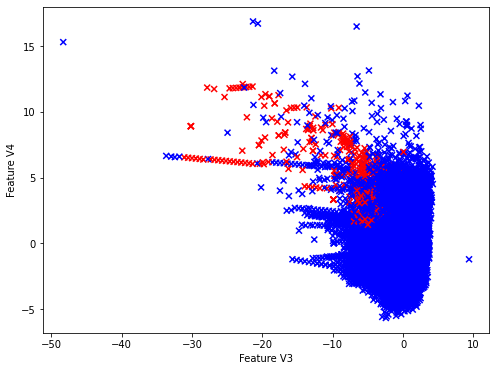

In [ ]:
###    Part 3    ###

df_3a = df[['V3','V4','Class']]

plt.figure(figsize=(8,6))
plt.scatter(df_3a['V3'],df_3a['V4'],c=df_3a['Class'],cmap='bwr',marker='x')
plt.xlabel('Feature V3')
plt.ylabel('Feature V4')
plt.show()


In [ ]:
## Part 3 : Calculation for AUC on training and Val for V3 and V4 ##
for i in [3]:

  X_train_feat_3a = X_train_np[:,i:i+1]  ### Used first train val test split data
  X_val_feat_3a = X_val_np[:,i:i+1]       ### Used first train val test split data

  gm3 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
  gm3.fit(X_train_feat_3a)

  c_tr_3a = gm3.score_samples(X_train_feat_3a)
  c_val_3a = gm3.score_samples(X_val_feat_3a)

  fpr_tr_3a, tpr_tr_3a, _ = roc_curve(y_train_np, 1-c_tr_3a)
  fpr_val_3a, tpr_val_3a, _ = roc_curve(y_val_np, 1-c_val_3a)

  #AUC_train_3a=np.append(AUC_train, auc(fpr_tr_3a, tpr_tr_3a))
  #AUC_val_3a=np.append(AUC_val, auc(fpr_val_3a, tpr_val_3a))

  AUC_train_3a = auc(fpr_tr_3a, tpr_tr_3a)
  AUC_val_3a = auc(fpr_val_3a, tpr_val_3a)
  #Feature_index_3a = np.append(Feature_index_3a,i)

print('AUC for training on v',i,' & V',i+1,' features: ', AUC_train_3a)
print('AUC for Validation on v',i,' & V',i+1,' features: ', AUC_val_3a)


AUC for training on v 3  & V 4  features:  0.8765373286404597
AUC for Validation on v 3  & V 4  features:  0.8383637446471399


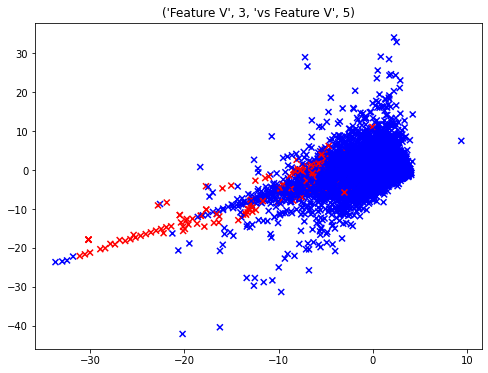

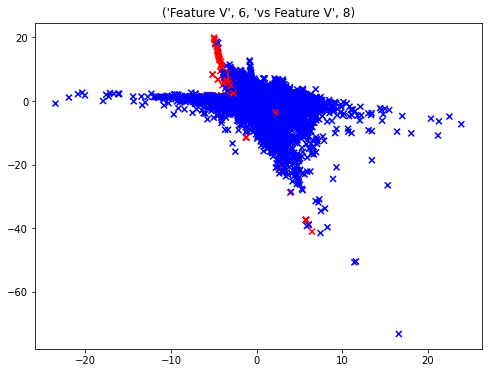

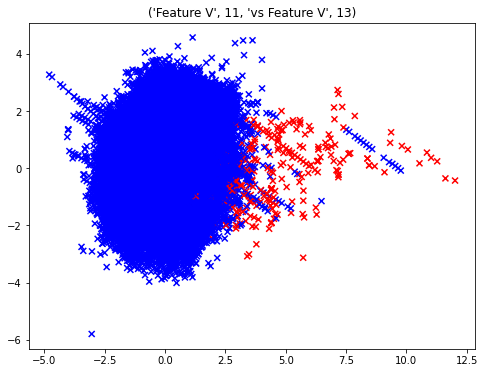

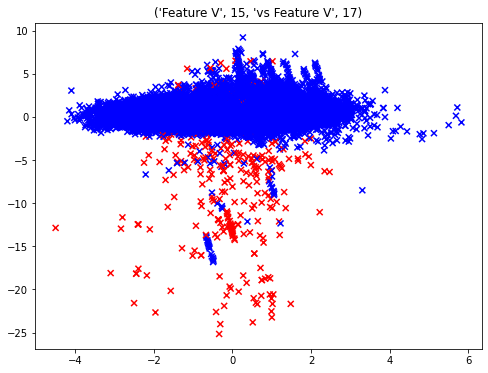

In [ ]:
## Plot for part 3 for pairs : pair(V3,V5) , pair(V6,V8) , pair (V11, V13) , pair (V15,V17) ##

for i in [3,6,11,15]:

  X_train_feat_3a_1 = X_train_np[:,i:i+2]  ### Used first train val test split data
  X_val_feat_3a_1 = X_val_np[:,i:i+2]       ### Used first train val test split data

  plt.figure(figsize=(8,6))
  plt.scatter(X_train_np[:,i],X_train_np[:,i+2],c=y_train_np,cmap='bwr',marker='x')
  #plt.xlabel('Feature V',i)
  #plt.ylabel('Feature V',i+2)
  plt.title(("Feature V",i,"vs Feature V",i+2))
  plt.show()

In [ ]:
## Define feature to calculate f1 score for multiple features ##

def F1_score_calulator_Multiple_feature(x_train_with_fea_np, x_val_with_fea_np, y_training, y_validation,n_component_for_gm):
  
  X_train_funt = x_train_with_fea_np   ## input train features in numpy format
  X_val_funt = x_val_with_fea_np       ## input val feature in numpy format
  y_train_funt = y_training
  y_val_funt = y_validation
  
  gm_funt = GaussianMixture(n_components = n_component_for_gm,
                    covariance_type = 'full', random_state=0, )                ### n_component_for_gm shold numeric
  gm_funt.fit(X_train_funt)
  c_funt = gm_funt.score_samples(X_val_funt)               ## c for validation set
  
## Calculate f1 score ##
  f1_scores_funt = np.zeros((0,0))

  for k in range(1,200):
    tr_funt = sorted(c_funt)[k]
    f1_funt = f1_score(y_val_funt, c_funt<tr_funt)
    f1_scores_funt=np.append(f1_scores_funt,f1_funt)

  f1_scores_funt_max = np.max(f1_scores_funt)
  tr_funt_index = np.argmax(f1_scores_funt)
  tr_funt_max = sorted(c_funt)[tr_funt_index]

  return f1_scores_funt_max, tr_funt_max

In [ ]:
## Define feature to calculate AUC for multiple features ##
def AUC_calulator_Multiple_feature(x_train_with_fea_np, x_val_with_fea_np, y_training, y_validation, n_component_for_gm):
  
  X_train_funt = x_train_with_fea_np    ## input train features in numpy format
  X_val_funt = x_val_with_fea_np        ## input val features in numpy format
  y_train_funt = y_training
  y_val_funt = y_validation
  
  
  gm_funt = GaussianMixture(n_components = n_component_for_gm,
                    covariance_type = 'full', random_state=0, )
  gm_funt.fit(X_train_funt)
  c_funt_tr = gm_funt.score_samples(X_train_funt)              ## c for train set
  c_funt_val = gm_funt.score_samples(X_val_funt)               ## c for validation set

  ## Calculate AUC score ##

  fpr_tr_funt, tpr_tr_funt, _ = roc_curve(y_train_funt, 1-c_funt_tr)
  fpr_val_funt, tpr_val_funt, _ = roc_curve(y_val_funt, 1-c_funt_val)

  AUC_train_funt = auc(fpr_tr_funt, tpr_tr_funt)
  AUC_val_funt = auc(fpr_val_funt, tpr_val_funt)

  return AUC_train_funt,AUC_val_funt


Max F1_scores_V 3  & V 5 : 0.3116883116883116 for K : -18.2092587363822
AUC for training on V 3  & V 5  features:  0.9226838221185059
AUC for Validation on V 3  & V 5  features:  0.9124181455921965


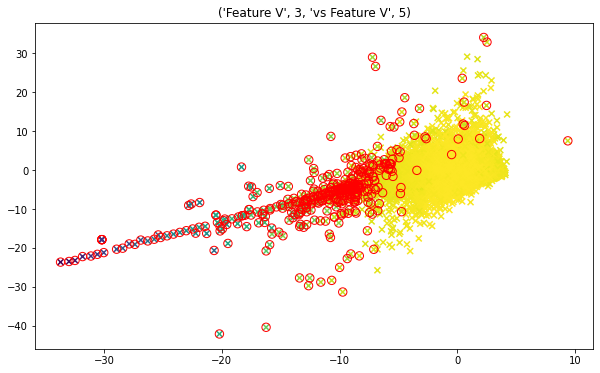


Max F1_scores_V 6  & V 8 : 0.16981132075471697 for K : -68.16301568421464
AUC for training on V 6  & V 8  features:  0.8603366323410531
AUC for Validation on V 6  & V 8  features:  0.8527222517319157


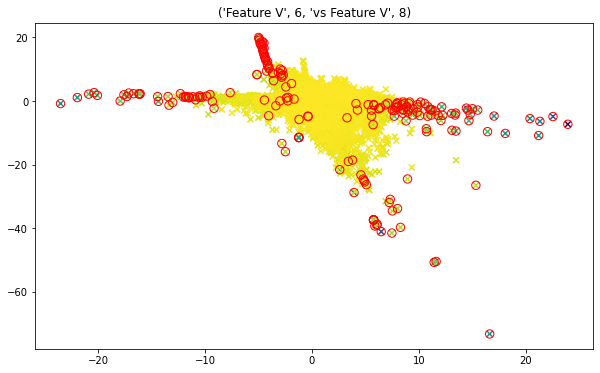


Max F1_scores_V 11  & V 13 : 0.6440677966101696 for K : -14.71828274448584
AUC for training on V 11  & V 13  features:  0.924491849915138
AUC for Validation on V 11  & V 13  features:  0.8857995855579326


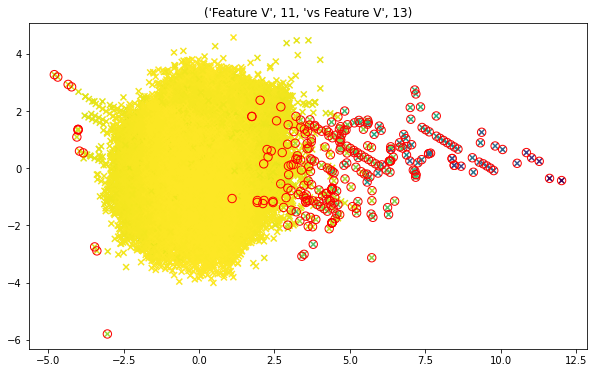


Max F1_scores_V 15  & V 17 : 0.5148514851485149 for K : -16.486017634526675
AUC for training on V 15  & V 17  features:  0.8991283987087096
AUC for Validation on V 15  & V 17  features:  0.8441671233087622


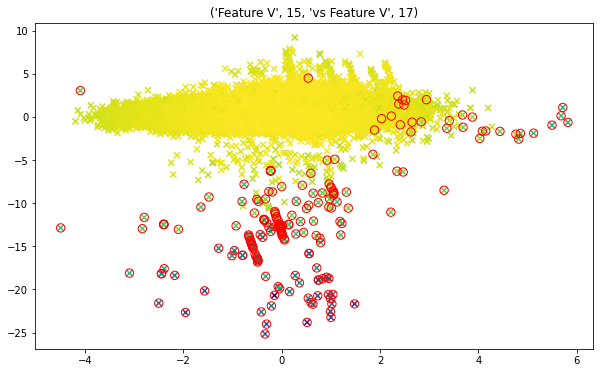

In [ ]:
## Calculation for part 3 for pairs : , pair(V6,V8) , pair (V11, V13) , pair (V15,V17) ##

for i in [3,6,11,15]:

  X_train_feat_3a_1 = X_train_np[:,i:i+2]  ### Used first train val test split data
  X_val_feat_3a_1 = X_val_np[:,i:i+2]       ### Used first train val test split data

  AUC_3a = AUC_calulator_Multiple_feature(X_train_feat_3a_1,X_val_feat_3a_1,y_train_np,y_val_np,1)    ## Calculating F1 score with function
  AUC_train_3a_1 = AUC_3a[0]
  AUC_val_3a_1 = AUC_3a[1]

## Calculate f1 score for current pair ##
  F1_3a = F1_score_calulator_Multiple_feature(X_train_feat_3a_1,X_val_feat_3a_1,y_train_np,y_val_np,1)  ## Calculating F1 score with function
  f1_scores_3a_1_max = F1_3a[0]
  tr_3a_1_max = F1_3a[1]


  print('\nMax F1_scores_V',i,' & V',i+2,':', f1_scores_3a_1_max,'for K :', tr_3a_1_max )
  print('AUC for training on V',i,' & V',i+2,' features: ', AUC_train_3a_1)
  print('AUC for Validation on V',i,' & V',i+2,' features: ', AUC_val_3a_1)

## Plotting Outlier graph for features ##
  gm3a_1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )     ### Only used for outliers plotting
  gm3a_1.fit(X_train_feat_3a_1)                                     ### Only used for outliers plotting

  c_tr_3a_1 = gm3a_1.score_samples(X_train_feat_3a_1)               ### Only used for outliers plotting
  #c_val_3a_1 = gm3a_1.score_samples(X_val_feat_3a_1)

  plt.figure(figsize=(10,6))
  plt.scatter(X_train_np[:,i],X_train_np[:,i+2],c=c_tr_3a_1,cmap='viridis',marker='x')

  outliers_3a_1 = np.nonzero(c_tr_3a_1 < tr_3a_1_max)[0]
  plt.scatter(X_train_np[outliers_3a_1,i],X_train_np[outliers_3a_1,i+2],marker="o",facecolor= "none",edgecolor="r",s=70)
  plt.title(("Feature V",i,"vs Feature V",i+2))
  plt.show()

## **Part 4: Single feature model with two Gaussian distributions. [2 Marks]**
Now we will use two different distributions for fraudulent and non-fraudulent transactions.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **non-fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.25]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the transaction is a fraud (the transaction belongs to the $G_2$ distribution which represents fraudulent transactions). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.25]**
  5. Repeat the steps above for all the features. What is the best F1 Score that you get for training and validation? Which feature and what c? **[1]**

In [ ]:
## Variables for part 4 ##

'''X_nf_train,y_nf_train, X_nf_val, y_nf_val, X_nf_test, y_nf_test
X_f_train,y_f_train, X_f_val, y_f_val, X_f_test, y_f_test
X_2b_val
y_2b_val 
y_2b_val_np'''

'X_nf_train,y_nf_train, X_nf_val, y_nf_val, X_nf_test, y_nf_test\nX_f_train,y_f_train, X_f_val, y_f_val, X_f_test, y_f_test\nX_2b_val\ny_2b_val \ny_2b_val_np'

In [ ]:
###  Part 4   ###
### Finding value of c for max f1 score validation set ###

f1_scores_all_max_4a = np.zeros((0,0))
c_val_all_4a_max = np.zeros((0,0))

for i in range(1,len(X_train_np[1:30])):

  X_nf_train_4a = X_nf_train.values[:,i].reshape(-1,1)    ### Non fraud training data from second split _ part 2b
  X_f_train_4a = X_f_train.values[:,i].reshape(-1,1)      ### Fraud training data from second split _ part 2b

  X_val_4a = X_val_np[:,i].reshape(-1,1)           ### Merged validation data from second split _ part 2b

  

  G1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
  G2 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )

  G1.fit(X_nf_train_4a)      ## Gaussian distribution non fraud train
  G2.fit(X_f_train_4a)       ## Gaussian distribution fraud train

  S1 = G1.score_samples(X_val_4a)     ## sample score for non fraud train
  S2 = G2.score_samples(X_val_4a)     ## sample score for fraud train

  #fpr_val_4a, tpr_val_4a, _ = roc_curve(y_2b_val_np, 1-S1)   ### Not required for this part
  #AUC_val_4a = auc(fpr_val_4a, tpr_val_4a)                   ### Not required for this part

## Calculate f1 score for current feature ##

  f1_scores_4a = np.zeros((0,0))
  c_val_4a = np.zeros((0,0))

  for ct in np.arange(0.0,15.1,0.1):
    #const = ct/10
    f1_4a = f1_score(y_val_np, S1 < ct*S2)
    f1_scores_4a=np.append(f1_scores_4a,f1_4a )
    c_val_4a = np.append(c_val_4a,ct)

  f1_scores_4a_max = np.max(f1_scores_4a)
  c_val_4a_max = c_val_4a[np.where(f1_scores_4a == max(f1_scores_4a))[0][0]]
  f1_scores_all_max_4a = np.append(f1_scores_all_max_4a,f1_scores_4a_max)
  c_val_all_4a_max = np.append(c_val_all_4a_max,c_val_4a_max)

  #c_val_index = np.where(f1_scores_4a == max(f1_scores_4a))[0][0]  ## Alternate method
  #c_val_4a_max = c_val_4a[c_val_index]                             ## Alternate method
  
  #plt.plot(f1_scores_4a, linestyle = '--', )
  #plt.show()
  #print('\nMax F1_scores_V',i,':', f1_scores_4a_max ,  'for  C =', c_val_4a_max )

c_tr_4ab = c_val_all_4a_max[np.where(f1_scores_all_max_4a == max(f1_scores_all_max_4a))[0][0]]   ## Max value of c to be assigned for validation set

#print('max F1 score',f1_scores_all_max_4a)
#print('max F1 score for c: ',c_val_all_4a_max)
Table_4a = pd.DataFrame(data = [Features_V,f1_scores_all_max_4a,c_val_all_4a_max]).T   ## Dataframe with F1 scores with corresponding c values
Table_4a.columns=['Features','f1_scores_max_4a','c_val_4a_max']

Table_4a.sort_values(by = ['f1_scores_max_4a'],ascending=False)  ## Sorted table for max f1 ##


,Features,f1_scores_max_4a,c_val_4a_max
16,V17,0.654545,7.2
13,V14,0.637168,9.3
11,V12,0.611111,4.8
15,V16,0.568807,4.6
10,V11,0.517241,3.8
17,V18,0.383838,4.4
8,V9,0.365591,3.3
3,V4,0.363636,4.5
9,V10,0.340909,8.6
2,V3,0.292135,11.6


In [ ]:
###  Part 4b   ###
### Finding max f1 score with c = max value from above validation set ###

f1_scores_4b = np.zeros((0,0))

y_nf_train_np = y_nf_train.to_numpy()    ## Convert to numpy
y_f_train_np = y_f_train.to_numpy()      ## Convert to numpy

for i in range(1,len(X_train_np[1:30])):

  X_nf_train_4b = X_nf_train.values[:,i].reshape(-1,1)    ### Non fraud training data from second split _ part 2b
  X_f_train_4b = X_f_train.values[:,i].reshape(-1,1)      ### Fraud training data from second split _ part 2b

  X_train_4b = X_train_np[:,i].reshape(-1,1)           ### Fraud training data from second split _ part 2b
  c_tr_4b = c_val_all_4a_max[i-1]                      ### i-1 as index starts from zero for this array
  

  G1b = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
  G2b = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )

  G1b.fit(X_nf_train_4b)      ## Gaussian distribution non fraud train
  G2b.fit(X_f_train_4b)       ## Gaussian distribution fraud train

  S1_tr = G1b.score_samples(X_train_4b)     ## sample score for non fraud train
  S2_tr = G2b.score_samples(X_train_4b)     ## sample score for fraud train

## Calculate f1 score  ##

  f1_4b = f1_score(y_train_np, S1_tr < c_tr_4b * S2_tr)
  f1_scores_4b=np.append(f1_scores_4b,f1_4b )

#print('Max F1 score for training',max(f1_scores_4b),' for c :', c_tr_4ab)

Table_4b = pd.DataFrame(data = [Features_V,c_val_all_4a_max,f1_scores_all_max_4a,f1_scores_4b]).T   ## Dataframe with F1 scores with corresponding c values
Table_4b.columns=['Features','c','f1_scores_val_4a','f1_score_training_4b']
Table_4b.sort_values(by = ['f1_scores_val_4a'],ascending=False)  ## Sorted table for max f1 and feature##

,Features,c,f1_scores_val_4a,f1_score_training_4b
16,V17,7.2,0.654545,0.642173
13,V14,9.3,0.637168,0.634823
11,V12,4.8,0.611111,0.683087
15,V16,4.6,0.568807,0.532695
10,V11,3.8,0.517241,0.603589
17,V18,4.4,0.383838,0.435101
8,V9,3.3,0.365591,0.427984
3,V4,4.5,0.363636,0.348837
9,V10,8.6,0.340909,0.414079
2,V3,11.6,0.292135,0.271186


*** Answer 4:  For feature V17 at c = 7.2,  max f1 scores for validation is 0.655 and f1 score for training is 0.642 .  ***

In [ ]:
### Feature for  caluclation of F1_score_S1_S2_Multiple_feature ### 

def F1_score_S1_S2_Multiple_feature(x_train_with_fea_np, x_nf_train_with_fea_np, x_f_train_with_fea_np, x_val_with_fea_np, y_training, y_validation,n_component_for_gm1,n_component_for_gm2):
  
  X_train_funt = x_train_with_fea_np
  X_nf_train_funt = x_nf_train_with_fea_np   ## input train features in numpy format
  X_f_train_funt = x_f_train_with_fea_np
  X_val_funt = x_val_with_fea_np       ## input val feature in numpy format
  y_train_funt = y_training
  y_val_funt = y_validation
  
  G1_funt = GaussianMixture(n_components = n_component_for_gm1,
                    covariance_type = 'full', random_state=0, )
  G2_funt = GaussianMixture(n_components = n_component_for_gm2,
                    covariance_type = 'full', random_state=0, )

  G1_funt.fit(X_nf_train_funt)      ## Gaussian distribution non fraud train
  G2_funt.fit(X_f_train_funt)       ## Gaussian distribution fraud train

  S1_funt = G1_funt.score_samples(X_val_funt)     ## sample score for non fraud train
  S2_funt = G2_funt.score_samples(X_val_funt)     ## sample score for fraud train

  ## Calculate f1 score ##
  f1_scores_funt = np.zeros((0,0))
  c_val_funt = np.zeros((0,0))

  for ct in np.arange(1.0,15.1,0.1):
    #const = ct/10
    f1_funt = f1_score(y_val_funt, S1_funt < ct*S2_funt)
    f1_scores_funt=np.append(f1_scores_funt,f1_funt)
    c_val_funt = np.append(c_val_funt,ct)
   

  f1_scores_funt_max = np.max(f1_scores_funt)        ## Validation f1_score 
  c_val_funt_max = c_val_funt[np.where(f1_scores_funt == max(f1_scores_funt))[0][0]]
 

  S1_tr_funt = G1_funt.score_samples(X_train_funt)     ## sample score for non fraud train
  S2_tr_funt = G2_funt.score_samples(X_train_funt)     ## sample score for fraud train
 
  f1_tr_funt = f1_score(y_train_funt, S1_tr_funt < c_val_funt_max * S2_tr_funt)  ## Calculation of f1_train
  
  return f1_scores_funt_max,f1_tr_funt, c_val_funt_max

## **Part 5: Multivariate and Mixture of Gaussians Distribution [4 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate). 
*   To fit your model, you can take advantage of the Gaussian mixture model, where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).
*   You can choose to fit your Gaussians on non-fraudulent transactions or to both classes. 


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[4]**


**HINT !**

You might want to try a two-gaussian model, multiple features, a single component for the valid transaction, and multiple components for fraudulent ones! Why does it make sense to have multiple components for fraudulent transactions?

In [ ]:
### YOUR CODE HERE ###

In [ ]:
### Estimation feature importance wwith decision tree##

from sklearn import tree
dt_classifier = tree.DecisionTreeClassifier(random_state = 0)
dt_classifier.fit(X_train, y_train)
feature_importances = pd.Series(dt_classifier.feature_importances_, index=X_train.columns).sort_values(ascending= False) #Panda series with feature importance sorted in descending
#dt_least_important_feature = feature_importances.index[0]

feature_importances[0:13]  ### Getting feature importance using decision tree for first 10 V features

V17       0.541978
V14       0.107666
V10       0.070823
V27       0.032027
V26       0.027344
V4        0.020142
Amount    0.019166
V21       0.018743
V24       0.016691
V12       0.016674
Time      0.013356
V3        0.012924
V13       0.011611
dtype: float64

In [ ]:
'''X_train[['V14', 'V10','V4','V16','V11','V17']] '''

"X_train[['V14', 'V10','V4','V16','V11','V17']] "

In [ ]:
### Part 5 : 1 model with best 6 features from part 2a ####
### Model with 'V14', 'V10','V4','V16','V11','V17' with single gaussian components both classes ###

X_train_feat_5a_1_pd = X_train[['V14', 'V10','V4','V16','V11','V17']]      ### Select columns from X_train
X_train_feat_5a_1 = X_train_feat_5a_1_pd.to_numpy()                        ### Convert to numpy
X_val_feat_5a_1_pd = X_val[[ 'V14', 'V10','V4','V16','V11','V17']]      ### Select columns from X_train
X_val_feat_5a_1 = X_val_feat_5a_1_pd.to_numpy()

feature_list_5a_1 = X_train_feat_5a_1_pd.columns.to_list()

AUC_5a_1 = AUC_calulator_Multiple_feature(X_train_feat_5a_1,X_val_feat_5a_1,y_train_np,y_val_np,1)    ## Calculating AUC score with function refer part 3 
AUC_train_5a_1 = AUC_5a_1[0]
AUC_val_5a_1 = AUC_5a_1[1]

## Calculate f1 score validation score ##
F1_5a_1 = F1_score_calulator_Multiple_feature(X_train_feat_5a_1,X_val_feat_5a_1,y_train_np,y_val_np,1)  ## Calculating F1 score with function refer part 3 
f1_scores_5a_1_max = F1_5a_1[0]
thr_5a_1_max = F1_5a_1[1]

## Calculate f1 score train score ##
F1_tr_5a_1 = F1_score_calulator_Multiple_feature(X_train_feat_5a_1,X_train_feat_5a_1,y_train_np,y_train_np,1)  ## Calculating F1 score with function refer part 3  
f1_scores_tr_5a_1_max = F1_tr_5a_1[0]
thr_tr_5a_1_max = F1_tr_5a_1[1]

 
print('\nMax F1_scores validation with ',feature_list_5a_1,'features and single gaussian on both classes:', f1_scores_5a_1_max,'for K :', thr_5a_1_max )
print('Max F1_scores train : ', f1_scores_tr_5a_1_max,'for K :', thr_tr_5a_1_max )
print('AUC for training on V',feature_list_5a_1,' features: ', AUC_train_5a_1)
print('AUC for Validation on V',feature_list_5a_1,' features: ', AUC_val_5a_1)


Max F1_scores validation with  ['V14', 'V10', 'V4', 'V16', 'V11', 'V17'] features and single gaussian on both classes: 0.5666666666666667 for K : -76.88851863532209
Max F1_scores train :  0.5845588235294118 for K : -101.26192183750257
AUC for training on V ['V14', 'V10', 'V4', 'V16', 'V11', 'V17']  features:  0.9633642290798685
AUC for Validation on V ['V14', 'V10', 'V4', 'V16', 'V11', 'V17']  features:  0.9545863312499256


In [ ]:
### Part 5 : 2nd model with 5 features from part 2a ####
### Model with 'V14', 'V10','V4','V16','V11','V17' with single gaussian components 2 components both classes ###

X_train_feat_5a_2_pd = X_train[[ 'V14','V18','V4','V16','V11','V17']]      ### Select columns from X_train
X_train_feat_5a_2 = X_train_feat_5a_2_pd.to_numpy()                        ### Convert to numpy
X_val_feat_5a_2_pd = X_val[[ 'V14','V18','V4','V16','V11','V17']]      ### Select columns from X_train
X_val_feat_5a_2 = X_val_feat_5a_2_pd.to_numpy()

feature_list_5a_2 = X_train_feat_5a_2_pd.columns.to_list()

AUC_5a_2 = AUC_calulator_Multiple_feature(X_train_feat_5a_2,X_val_feat_5a_2,y_train_np,y_val_np,2)    ## Calculating F1 score with function refer part 3 
AUC_train_5a_2 = AUC_5a_2[0]
AUC_val_5a_2 = AUC_5a_2[1]

## Calculate f1 score validation score ##
F1_5a_2 = F1_score_calulator_Multiple_feature(X_train_feat_5a_2,X_val_feat_5a_2,y_train_np,y_val_np,2)  ## Calculating F1 score with function refer part 3 
f1_scores_5a_2_max = F1_5a_2[0]
thr_5a_2_max = F1_5a_2[1]

## Calculate f1 score training score ##
F1_tr_5a_2 = F1_score_calulator_Multiple_feature(X_train_feat_5a_2,X_train_feat_5a_2,y_train_np,y_train_np,2)  ## Calculating F1 score with function refer part 3 
f1_scores_tr_5a_2_max = F1_tr_5a_2[0]
thr_tr_5a_2_max = F1_tr_5a_2[1]
 

print('\nMax F1_scores',feature_list_5a_2,'features with single gaussian 2 components on both classes:', f1_scores_5a_2_max,'for K :', thr_5a_2_max )
print('Max F1_scores train : ', f1_scores_tr_5a_2_max,'for K :', thr_tr_5a_2_max )
print('AUC for training on V',feature_list_5a_2,' features: ', AUC_train_5a_2)
print('AUC for Validation on V',feature_list_5a_2,' features: ', AUC_val_5a_2)


Max F1_scores ['V14', 'V18', 'V4', 'V16', 'V11', 'V17'] features with single gaussian 2 components on both classes: 0.5238095238095237 for K : -22.81321296287619
Max F1_scores train :  0.476894639556377 for K : -28.088550006049854
AUC for training on V ['V14', 'V18', 'V4', 'V16', 'V11', 'V17']  features:  0.9602409383242194
AUC for Validation on V ['V14', 'V18', 'V4', 'V16', 'V11', 'V17']  features:  0.9411316605886029


In [ ]:
### Part 5 : 3rd model with best 4 features from part 2a ####
### Model with 'V17','V14','V12','V16' with single gaussian components 1 components both classes ###

X_train_feat_5a_3_pd = X_train[[ 'V17','V14','V12','V16']]      ### Select columns from X_train
X_train_feat_5a_3 = X_train_feat_5a_3_pd.to_numpy()                        ### Convert to numpy
X_val_feat_5a_3_pd = X_val[['V14','V17','V12','V16']]           ### Select columns from X_train
X_val_feat_5a_3 = X_val_feat_5a_3_pd.to_numpy()

feature_list_5a_3 = X_train_feat_5a_3_pd.columns.to_list()

AUC_5a_3 = AUC_calulator_Multiple_feature(X_train_feat_5a_3,X_val_feat_5a_3,y_train_np,y_val_np,1)    ## Calculating AUC score with function refer part 3 
AUC_train_5a_3 = AUC_5a_3[0]
AUC_val_5a_3 = AUC_5a_3[1]

## Calculate f1 score validation score ##
F1_5a_3 = F1_score_calulator_Multiple_feature(X_train_feat_5a_3,X_val_feat_5a_3,y_train_np,y_val_np,1)  ## Calculating F1 score with function refer part 3 
f1_scores_5a_3_max = F1_5a_3[0]
thr_5a_3_max = F1_5a_3[1]

## Calculate f1 score training score ##
F1_tr_5a_3 = F1_score_calulator_Multiple_feature(X_train_feat_5a_3,X_train_feat_5a_3,y_train_np,y_train_np,1)  ## Calculating F1 score with function refer part 3 
f1_scores_tr_5a_3_max = F1_tr_5a_3[0]
thr_tr_5a_3_max = F1_tr_5a_3[1]
 
print('\nMax F1_scores',feature_list_5a_3,'features with single gaussian 1 components on both classes:', f1_scores_5a_3_max,'for K :', thr_5a_3_max )
print('Max F1_scores train : ', f1_scores_tr_5a_3_max,'for K :', thr_tr_5a_3_max )
print('AUC for training on V',feature_list_5a_3,' features: ', AUC_train_5a_3)
print('AUC for Validation on V',feature_list_5a_3,' features: ', AUC_val_5a_3)


Max F1_scores ['V17', 'V14', 'V12', 'V16'] features with single gaussian 1 components on both classes: 0.7014925373134329 for K : -40.146959340644166
Max F1_scores train :  0.6139705882352942 for K : -85.27953412729914
AUC for training on V ['V17', 'V14', 'V12', 'V16']  features:  0.9600426614282185
AUC for Validation on V ['V17', 'V14', 'V12', 'V16']  features:  0.9369197058735022


In [ ]:
### Part 5 : 4th model with best 4 features from decision tree ####
### Model with 'V17','V14','V12','V16' with single gaussian components 1 components both classes ###

X_train_feat_5a_4_pd = X_train[[ 'V17','V14','V12','V16']]      ### Select columns from X_train
X_train_feat_5a_4 = X_train_feat_5a_4_pd.to_numpy()                        ### Convert to numpy
X_val_feat_5a_4_pd = X_val[['V14','V17','V12','V16']]      ### Select columns from X_train
X_val_feat_5a_4 = X_val_feat_5a_4_pd.to_numpy()

feature_list_5a_4 = X_train_feat_5a_4_pd.columns.to_list()

AUC_5a_4 = AUC_calulator_Multiple_feature(X_train_feat_5a_4,X_val_feat_5a_4,y_train_np,y_val_np,1)    ## Calculating F1 score with function part 3 
AUC_train_5a_4 = AUC_5a_4[0]
AUC_val_5a_4 = AUC_5a_4[1]

## Calculate f1 score validation score ##
F1_5a_4 = F1_score_calulator_Multiple_feature(X_train_feat_5a_4,X_val_feat_5a_4,y_train_np,y_val_np,1)  ## Calculating F1 score with function part 3 
f1_scores_5a_4_max = F1_5a_4[0]
thr_5a_4_max = F1_5a_4[1]

## Calculate f1 score training score ##
F1_tr_5a_4 = F1_score_calulator_Multiple_feature(X_train_feat_5a_4,X_train_feat_5a_4,y_train_np,y_train_np,1)  ## Calculating F1 score with function part 3 
f1_scores_tr_5a_4_max = F1_tr_5a_4[0]
thr_tr_5a_4_max = F1_tr_5a_4[1]
 
print('\nMax F1_scores',feature_list_5a_4,'features with single gaussian 1 components on both classes: :', f1_scores_5a_4_max,'for K :', thr_5a_4_max )
print('Max F1_scores train : ', f1_scores_tr_5a_4_max,'for K :', thr_tr_5a_4_max )
print('AUC for training on V',feature_list_5a_4,' features: ', AUC_train_5a_4)
print('AUC for Validation on V',feature_list_5a_4,' features: ', AUC_val_5a_4)



Max F1_scores ['V17', 'V14', 'V12', 'V16'] features with single gaussian 1 components on both classes: : 0.7014925373134329 for K : -40.146959340644166
Max F1_scores train :  0.6139705882352942 for K : -85.27953412729914
AUC for training on V ['V17', 'V14', 'V12', 'V16']  features:  0.9600426614282185
AUC for Validation on V ['V17', 'V14', 'V12', 'V16']  features:  0.9369197058735022


In [ ]:
### Part 5 : 5th model with S1 and S2 for fraud and non fraud models ####
### Model with 'V17','V14','V12','V16' with multi gaussian 1 component for non fraud and 2 components for fraud ###

X_train_feat_5a_5_pd = X_train[['V17','V14','V12','V16']]           ### Select columns from X_train
X_train_feat_5a_5 = X_train_feat_5a_5_pd.to_numpy()                                             ### Convert to numpy

feature_list_5a_5 = X_train_feat_5a_5_pd.columns.to_list()

X_nf_train_feat_5a_5_pd = X_nf_train[feature_list_5a_5]                          ### Select columns from X_train non fraud
X_nf_train_feat_5a_5 = X_nf_train_feat_5a_5_pd.to_numpy()                        ### Convert to numpy

X_f_train_feat_5a_5_pd = X_f_train[feature_list_5a_5]                           ### Select columns from X_train fraud
X_f_train_feat_5a_5 = X_f_train_feat_5a_5_pd.to_numpy()                         ### Convert to numpy

X_val_feat_5a_5_pd = X_val[feature_list_5a_5]                                  ### Select columns from X_val
X_val_feat_5a_5 = X_val_feat_5a_5_pd.to_numpy()

feature_list_5a_5 = X_train_feat_5a_5_pd.columns.to_list()

#AUC_5a_5 = AUC_calulator_Multiple_feature(X_train_feat_5a_5,X_val_feat_5a_5,y_train_np,y_val_np,3)    ## Calculating F1 score with function
#AUC_train_5a_5 = AUC_5a_5[0]
#AUC_val_5a_5 = AUC_5a_5[1]

## Calculate f1 score for current pair ##                                                               ## Calculating F1 score with function refer part 4
F1_5a_5 = F1_score_S1_S2_Multiple_feature(X_train_feat_5a_5,X_nf_train_feat_5a_5_pd,X_f_train_feat_5a_5_pd,X_val_feat_5a_5,y_train_np,y_val_np,1,2)   
f1_scores_5a_5_max = F1_5a_5[0]
f1_scores_tr_5a_5_max = F1_5a_5[1]
c_5a_5_max = F1_5a_5[2]
 
print('\nMax F1_scores',feature_list_5a_5,'features with multigaussian components 1 for nonfraud and 2 for fraud  :', f1_scores_5a_5_max,'for c :', c_5a_5_max )
print('Max F1_scores training : ', f1_scores_tr_5a_5_max,'for c :', c_5a_5_max )

#print('AUC for Validation on V',feature_list_5a_5,' features: ', AUC_val_5a_5)
#print('AUC for training on V',feature_list_5a_5,' features: ', AUC_train_5a_5)


Max F1_scores ['V17', 'V14', 'V12', 'V16'] features with multigaussian components 1 for nonfraud and 2 for fraud  : 0.7438016528925621 for c : 6.700000000000005
Max F1_scores training :  0.7808417997097242 for c : 6.700000000000005


In [ ]:
### Part 5 : 6th model with S1 and S2 for fraud and non fraud models ####
### Model with 'V17','V14','V12','V16','V4','V10' with multi gaussian 1 component for non fraud and 3 components for fraud ###

X_train_feat_5a_6_pd = X_train[['V17','V14','V12','V16','V4','V10']]          ### Select columns from X_train
X_train_feat_5a_6 = X_train_feat_5a_6_pd.to_numpy()                          ### Convert to numpy

feature_list_5a_6 = X_train_feat_5a_6_pd.columns.to_list()

X_nf_train_feat_5a_6_pd = X_nf_train[feature_list_5a_6]                    ### Select columns from X_train non fraud
X_nf_train_feat_5a_6 = X_nf_train_feat_5a_6_pd.to_numpy()                  ### Convert to numpy

X_f_train_feat_5a_6_pd = X_f_train[feature_list_5a_6]                      ### Select columns from X_train fraud
X_f_train_feat_5a_6 = X_f_train_feat_5a_6_pd.to_numpy()                    ### Convert to numpy

X_val_feat_5a_6_pd = X_val[feature_list_5a_6]                              ### Select columns from X_val
X_val_feat_5a_6 = X_val_feat_5a_6_pd.to_numpy()

feature_list_5a_6 = X_train_feat_5a_6_pd.columns.to_list()

#AUC_5a_6 = AUC_calulator_Multiple_feature(X_train_feat_5a_6,X_val_feat_5a_6,y_train_np,y_val_np,3)    ## Calculating F1 score with function
#AUC_train_5a_6 = AUC_5a_6[0]
#AUC_val_5a_6 = AUC_5a_6[1]

## Calculate f1 score for current pair ##                                                    ## Calculating F1 score with function refer part 4
F1_5a_6 = F1_score_S1_S2_Multiple_feature(X_train_feat_5a_6,X_nf_train_feat_5a_6_pd,X_f_train_feat_5a_6_pd,X_val_feat_5a_6,y_train_np,y_val_np,1,3)  
f1_scores_5a_6_max = F1_5a_6[0]
f1_scores_tr_5a_6_max = F1_5a_6[1]
c_5a_6_max = F1_5a_6[2]
 
print('\nMax F1_scores',feature_list_5a_6,'features with multigaussian components 1 for nonfraud and 3 for fraud  :', f1_scores_5a_6_max,'for c :', c_5a_6_max )
print('Max F1_scores training : ', f1_scores_tr_5a_6_max,'for c :', c_5a_6_max )
#print('AUC for Validation on V',feature_list_5a_6,' features: ', AUC_val_5a_6)
#print('AUC for training on V',feature_list_5a_6,' features: ', AUC_train_5a_6)



Max F1_scores ['V17', 'V14', 'V12', 'V16', 'V4', 'V10'] features with multigaussian components 1 for nonfraud and 3 for fraud  : 0.7804878048780487 for c : 5.100000000000003
Max F1_scores training :  0.7745504840940526 for c : 5.100000000000003


In [ ]:
### Part 5 : 7th model with S1 and S2 for fraud and non fraud models ####
### Model with 'V17','V14','V12','V16','V4','V10' with multi gaussian 1 component for non fraud and 5 components for fraud ###

X_train_feat_5a_7_pd = X_train[['V17','V14','V12','V16','V4','V10','V11','V18','V7']]          ### Select columns from X_train
X_train_feat_5a_7 = X_train_feat_5a_7_pd.to_numpy()                                            ### Convert to numpy

feature_list_5a_7 = X_train_feat_5a_7_pd.columns.to_list()

X_nf_train_feat_5a_7_pd = X_nf_train[feature_list_5a_7]                         ### Select columns from X_train non fraud
X_nf_train_feat_5a_7 = X_nf_train_feat_5a_7_pd.to_numpy()                        ### Convert to numpy

X_f_train_feat_5a_7_pd = X_f_train[feature_list_5a_7]                           ### Select columns from X_train fraud
X_f_train_feat_5a_7 = X_f_train_feat_5a_7_pd.to_numpy()                         ### Convert to numpy

X_val_feat_5a_7_pd = X_val[feature_list_5a_7]                                   ### Select columns from X_val
X_val_feat_5a_7 = X_val_feat_5a_7_pd.to_numpy()

feature_list_5a_7 = X_train_feat_5a_7_pd.columns.to_list()

#AUC_5a_7 = AUC_calulator_Multiple_feature(X_train_feat_5a_7,X_val_feat_5a_7,y_train_np,y_val_np,3)    ## Calculating F1 score with function
#AUC_train_5a_7 = AUC_5a_7[0]
#AUC_val_5a_7 = AUC_5a_7[1]

## Calculate f1 score for current pair ##                                                              ## Calculating F1 score with function refer part 4
F1_5a_7 = F1_score_S1_S2_Multiple_feature(X_train_feat_5a_7,X_nf_train_feat_5a_7_pd,X_f_train_feat_5a_7_pd,X_val_feat_5a_7,y_train_np,y_val_np,1,7)  
f1_scores_5a_7_max = F1_5a_7[0]
f1_scores_tr_5a_7_max = F1_5a_7[1]
c_5a_7_max = F1_5a_7[2]
 
print('\nMax F1_scores',feature_list_5a_7,'features with multigaussian components 1 for nonfraud and 3 for fraud  :', f1_scores_5a_7_max,'for c :', c_5a_7_max )
print('Max F1_scores training : ', f1_scores_tr_5a_7_max,'for c :', c_5a_7_max )

#print('AUC for Validation on V',feature_list_5a_7,' features: ', AUC_val_5a_7)
#print('AUC for training on V',feature_list_5a_7,' features: ', AUC_train_5a_7)


Max F1_scores ['V17', 'V14', 'V12', 'V16', 'V4', 'V10', 'V11', 'V18', 'V7'] features with multigaussian components 1 for nonfraud and 3 for fraud  : 0.8 for c : 3.100000000000002
Max F1_scores training :  0.7849462365591396 for c : 3.100000000000002


In [ ]:
### Part 5 : 8th model with best 6 features from part 2a ####
### Model with 'V14', 'V10','V4','V16','V11','V17' with single gaussian components non fraud classes ###

X_train_feat_5a_8_pd = X_train[['V14', 'V10','V4','V16','V11','V17']]      ### Select columns from X_train
X_train_feat_5a_8 = X_train_feat_5a_8_pd.to_numpy()                        ### Convert to numpy

feature_list_5a_8 = X_train_feat_5a_8_pd.columns.to_list()

X_nf_train_feat_5a_8_pd = X_nf_train[feature_list_5a_8]                    ### Select columns from X_train non fraud
X_nf_train_feat_5a_8 = X_nf_train_feat_5a_8_pd.to_numpy()                   ### Convert to numpy

X_val_feat_5a_8_pd = X_val[feature_list_5a_8]                              ### Select columns from X_val
X_val_feat_5a_8 = X_val_feat_5a_8_pd.to_numpy()




AUC_5a_8 = AUC_calulator_Multiple_feature(X_nf_train_feat_5a_8, X_train_feat_5a_8, y_nf_train_np, y_train_np,1)    ## Calculating AUC score with function refer part 3 
AUC_train_5a_8 = AUC_5a_8[1]

AUC_vl_5a_8 = AUC_calulator_Multiple_feature(X_nf_train_feat_5a_8,X_val_feat_5a_8,y_nf_train_np,y_val_np,1)    ## Calculating AUC score with function refer part 3 
AUC_val_5a_8 = AUC_vl_5a_8[1]

## Calculate f1 score validation score ##
F1_5a_8 = F1_score_calulator_Multiple_feature(X_nf_train_feat_5a_8_pd,X_val_feat_5a_8,y_nf_train_np,y_val_np,1)  ## Calculating F1 score with function refer part 3 
f1_scores_5a_8_max = F1_5a_8[0]
thr_5a_8_max = F1_5a_8[1]

## Calculate f1 score train score ##
F1_tr_5a_8 = F1_score_calulator_Multiple_feature(X_nf_train_feat_5a_8,X_train_feat_5a_8,y_nf_train_np,y_train_np,1)  ## Calculating F1 score with function refer part 3  
f1_scores_tr_5a_8_max = F1_tr_5a_8[0]
thr_tr_5a_8_max = F1_tr_5a_8[1]

 
print('\nMax F1_scores validation with ',feature_list_5a_8,'features and single gaussian on non fraud classes:', f1_scores_5a_8_max,'for K :', thr_5a_8_max )
print('Max F1_scores train : ', f1_scores_tr_5a_8_max,'for K :', thr_tr_5a_8_max )
print('AUC for training on V',feature_list_5a_8,' features: ', AUC_train_5a_8)
print('AUC for Validation on V',feature_list_5a_8,' features: ', AUC_val_5a_8)


Max F1_scores validation with  ['V14', 'V10', 'V4', 'V16', 'V11', 'V17'] features and single gaussian on non fraud classes: 0.6782608695652174 for K : -95.27453749504186
Max F1_scores train :  0.6139705882352942 for K : -174.38610469206816
AUC for training on V ['V14', 'V10', 'V4', 'V16', 'V11', 'V17']  features:  0.9633696323947223
AUC for Validation on V ['V14', 'V10', 'V4', 'V16', 'V11', 'V17']  features:  0.9534407019621263


In [ ]:
### Part 5 : 9th model with 3 features  ####
### Model with 'V14', 'V10','V4', with single gaussian components non fraud classes ###

X_train_feat_5a_9_pd = X_train[['V14', 'V10','V4']]      ### Select columns from X_train
X_train_feat_5a_9 = X_train_feat_5a_9_pd.to_numpy()                        ### Convert to numpy

feature_list_5a_9 = X_train_feat_5a_9_pd.columns.to_list()

X_nf_train_feat_5a_9_pd = X_nf_train[feature_list_5a_9]                    ### Select columns from X_train non fraud
X_nf_train_feat_5a_9 = X_nf_train_feat_5a_9_pd.to_numpy()                   ### Convert to numpy

X_val_feat_5a_9_pd = X_val[feature_list_5a_9]                              ### Select columns from X_val
X_val_feat_5a_9 = X_val_feat_5a_9_pd.to_numpy()


AUC_5a_9 = AUC_calulator_Multiple_feature(X_nf_train_feat_5a_9, X_train_feat_5a_9, y_nf_train_np, y_train_np,1)    ## Calculating AUC score with function refer part 3 
AUC_train_5a_9 = AUC_5a_9[1]

AUC_vl_5a_9 = AUC_calulator_Multiple_feature(X_nf_train_feat_5a_9,X_val_feat_5a_9,y_nf_train_np,y_val_np,1)    ## Calculating AUC score with function refer part 3 
AUC_val_5a_9 = AUC_vl_5a_9[1]

## Calculate f1 score validation score ##
F1_5a_9 = F1_score_calulator_Multiple_feature(X_nf_train_feat_5a_9_pd,X_val_feat_5a_9,y_nf_train_np,y_val_np,1)  ## Calculating F1 score with function refer part 3 
f1_scores_5a_9_max = F1_5a_9[0]
thr_5a_9_max = F1_5a_9[1]

## Calculate f1 score train score ##
F1_tr_5a_9 = F1_score_calulator_Multiple_feature(X_nf_train_feat_5a_9,X_train_feat_5a_9,y_nf_train_np,y_train_np,1)  ## Calculating F1 score with function refer part 3  
f1_scores_tr_5a_9_max = F1_tr_5a_9[0]
thr_tr_5a_9_max = F1_tr_5a_9[1]

 
print('\nMax F1_scores validation with ',feature_list_5a_9,'features and single gaussian on non fraud classes:', f1_scores_5a_9_max,'for K :', thr_5a_9_max )
print('Max F1_scores train : ', f1_scores_tr_5a_9_max,'for K :', thr_tr_5a_9_max )
print('AUC for training on V',feature_list_5a_9,' features: ', AUC_train_5a_9)
print('AUC for Validation on V',feature_list_5a_9,' features: ', AUC_val_5a_9)


Max F1_scores validation with  ['V14', 'V10', 'V4'] features and single gaussian on non fraud classes: 0.45112781954887216 for K : -52.481732801259994
Max F1_scores train :  0.5000000000000001 for K : -79.11420481837035
AUC for training on V ['V14', 'V10', 'V4']  features:  0.9646649715404785
AUC for Validation on V ['V14', 'V10', 'V4']  features:  0.9490740837939995


In [ ]:
### Part 5 : 10th model with 9 features  ####
### Model with 'V17','V14','V12','V16','V4','V10','V11','V18','V7' with single gaussian components non fraud classes ###

X_train_feat_5a_10_pd = X_train[['V17','V14','V12','V16','V4','V10','V11','V18','V7']]      ### Select columns from X_train
X_train_feat_5a_10 = X_train_feat_5a_10_pd.to_numpy()                        ### Convert to numpy

feature_list_5a_10 = X_train_feat_5a_10_pd.columns.to_list()

X_nf_train_feat_5a_10_pd = X_nf_train[feature_list_5a_10]                    ### Select columns from X_train non fraud
X_nf_train_feat_5a_10 = X_nf_train_feat_5a_10_pd.to_numpy()                   ### Convert to numpy

X_val_feat_5a_10_pd = X_val[feature_list_5a_10]                              ### Select columns from X_val
X_val_feat_5a_10 = X_val_feat_5a_10_pd.to_numpy()


AUC_5a_10 = AUC_calulator_Multiple_feature(X_nf_train_feat_5a_10, X_train_feat_5a_10, y_nf_train_np, y_train_np,1)    ## Calculating AUC score with function refer part 3 
AUC_train_5a_10 = AUC_5a_10[1]

AUC_vl_5a_10 = AUC_calulator_Multiple_feature(X_nf_train_feat_5a_10,X_val_feat_5a_10,y_nf_train_np,y_val_np,1)    ## Calculating AUC score with function refer part 3 
AUC_val_5a_10 = AUC_vl_5a_10[1]

## Calculate f1 score validation score ##
F1_5a_10 = F1_score_calulator_Multiple_feature(X_nf_train_feat_5a_10_pd,X_val_feat_5a_10,y_nf_train_np,y_val_np,1)  ## Calculating F1 score with function refer part 3 
f1_scores_5a_10_max = F1_5a_10[0]
thr_5a_10_max = F1_5a_10[1]

## Calculate f1 score train score ##
F1_tr_5a_10 = F1_score_calulator_Multiple_feature(X_nf_train_feat_5a_10,X_train_feat_5a_10,y_nf_train_np,y_train_np,1)  ## Calculating F1 score with function refer part 3  
f1_scores_tr_5a_10_max = F1_tr_5a_10[0]
thr_tr_5a_10_max = F1_tr_5a_10[1]

 
print('\nMax F1_scores validation with ',feature_list_5a_10,'features and single gaussian on non fraud classes:', f1_scores_5a_10_max,'for K :', thr_5a_10_max )
print('Max F1_scores train : ', f1_scores_tr_5a_10_max,'for K :', thr_tr_5a_10_max )
print('AUC for training on V',feature_list_5a_10,' features: ', AUC_train_5a_10)
print('AUC for Validation on V',feature_list_5a_10,' features: ', AUC_val_5a_10)


Max F1_scores validation with  ['V17', 'V14', 'V12', 'V16', 'V4', 'V10', 'V11', 'V18', 'V7'] features and single gaussian on non fraud classes: 0.671875 for K : -143.8206752303356
Max F1_scores train :  0.5919117647058824 for K : -363.04974713098295
AUC for training on V ['V17', 'V14', 'V12', 'V16', 'V4', 'V10', 'V11', 'V18', 'V7']  features:  0.9594546176532123
AUC for Validation on V ['V17', 'V14', 'V12', 'V16', 'V4', 'V10', 'V11', 'V18', 'V7']  features:  0.9514426740961112


In [ ]:
### Comprehending best model ###

model_list = [f for f in range(1,11)]
f1_scores_train_5 = [f1_scores_tr_5a_1_max, f1_scores_tr_5a_2_max, f1_scores_tr_5a_3_max,f1_scores_tr_5a_4_max,f1_scores_tr_5a_5_max,
                   f1_scores_tr_5a_6_max,f1_scores_tr_5a_7_max,f1_scores_tr_5a_8_max,f1_scores_tr_5a_9_max,f1_scores_tr_5a_10_max]

f1_scores_val_5 = [f1_scores_5a_1_max, f1_scores_5a_2_max, f1_scores_5a_3_max,f1_scores_5a_4_max,f1_scores_5a_5_max,
                   f1_scores_5a_6_max,f1_scores_5a_7_max,f1_scores_5a_8_max,f1_scores_5a_9_max,f1_scores_5a_10_max]

In [ ]:
model_list[4:7]

[5, 6, 7]

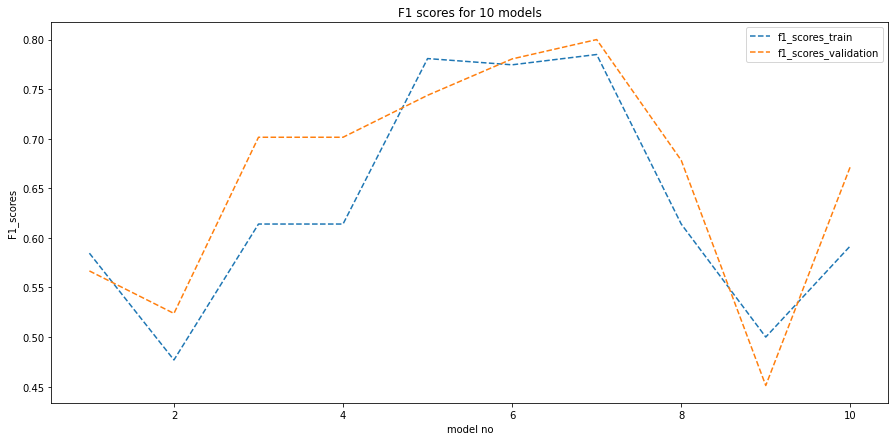

Model 1 to 4 are fit on single gaussian with data of both classes

 Model 5 to 7 are fit on multi gaussian with data of fraud and non fraud data

 Model 8,9 and 10 are fit on single gaussian with non fraud data


In [ ]:
## Plot for summary of f1 scores obtained ###

fig = plt.figure(figsize=(15, 7))
plt.plot(model_list, f1_scores_train_5, linestyle = '--', label='f1_scores_train')
plt.plot(model_list, f1_scores_val_5, linestyle = '--', label='f1_scores_validation')
plt.legend()
plt.xlabel("model no")
plt.ylabel("F1_scores")
plt.title("F1 scores for 10 models");
plt.show()

print('Model 1 to 4 are fit on single gaussian with data of both classes')
print('\n Model 5 to 7 are fit on multi gaussian with data of fraud and non fraud data')
print('\n Model 8,9 and 10 are fit on single gaussian with non fraud data')

*** It can be observed that F1 scores for model 5,6,7 perform well as compared to other models. Model 7 has the highest f1 score for both train and  validation so is our best model which we will use for predicting the final scores**

***For model : Max F1_scores validation score with ['V17', 'V14', 'V12', 'V16', 'V4', 'V10', 'V11', 'V18', 'V7'] features with multigaussian components 1 for nonfraud and 7 for fraud  : 0.8 for c : 3.1 and 
Max F1_scores training :  0.7849462365591396 for c : 3.1 ***

## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, precision and recall on the test set. **[1]**


In [ ]:
### YOUR CODE HERE ###
## Prediction for selected model ###

X_train_feat_6_pd = X_train[['V17','V14','V12','V16','V4','V10','V11','V18','V7']]          ### Select columns from X_train
X_train_feat_6 = X_train_feat_6_pd.to_numpy()                                             ### Convert to numpy

feature_list_6 = X_train_feat_6_pd.columns.to_list()

X_nf_train_feat_6_pd = X_nf_train[feature_list_6]                         ### Select columns from X_train non fraud
X_nf_train_feat_6 = X_nf_train_feat_6_pd.to_numpy()                        ### Convert to numpy

X_f_train_feat_6_pd = X_f_train[feature_list_6]                           ### Select columns from X_train fraud
X_f_train_feat_6 = X_f_train_feat_6_pd.to_numpy()                         ### Convert to numpy

X_val_feat_6_pd = X_val[feature_list_6]                                   ### Select columns from X_val
X_val_feat_6 = X_val_feat_6_pd.to_numpy()

X_test_feat_6_pd = X_test[feature_list_6]                                   ### Select columns from X_test
X_test_feat_6 = X_test_feat_6_pd.to_numpy()
y_test_np = y_test.to_numpy()



## Fit gaussian ##

G1_6 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
G2_6 = GaussianMixture(n_components = 7,
                    covariance_type = 'full', random_state=0, )

G1_6.fit(X_nf_train_feat_6)      ## Gaussian distribution non fraud train
G2_6.fit(X_f_train_feat_6)       ## Gaussian distribution fraud train

S1_6 = G1_6.score_samples(X_val_feat_6)     ## sample score for non fraud train
S2_6 = G2_6.score_samples(X_val_feat_6)     ## sample score for fraud train

## Calculate f1 score ##
f1_scores_6 = np.zeros((0,0))
c_val_6 = np.zeros((0,0))

for ct in np.arange(1.0,15.1,0.1):
  #const = ct/10
  f1_6 = f1_score(y_val_np, S1_6 < ct*S2_6)
  f1_scores_6=np.append(f1_scores_6,f1_6)
  c_val_6 = np.append(c_val_6,ct)
   

f1_scores_val_6_max = np.max(f1_scores_6)        ## Validation f1_score 
c_val_6_max = c_val_6[np.where(f1_scores_6 == max(f1_scores_6))[0][0]]
 

##Calculation of f1_test scores, precision and recall ###

S3_6 = G1_6.score_samples(X_test_feat_6)     ## sample score for non fraud train
S4_6 = G2_6.score_samples(X_test_feat_6)     ## sample score for fraud train
 
f1_tr_6 = f1_score(y_test_np, S3_6 < c_val_6_max * S4_6)    ## Calculation of f1_test

precision_6 = precision_score(y_test_np, S3_6 < c_val_6_max * S4_6)   ## Calculation of precision
recall_6 = recall_score(y_test_np, S3_6 < c_val_6_max * S4_6)         ## Calculation of recall

print('Max F1_scores validation',feature_list_6,'features \n with multigaussian components 1 for nonfraud and 7 for fraud  :', f1_scores_val_6_max,'for c :', c_val_6_max )
print('F1_scores test = ', f1_tr_6 )
print('Precision =', precision_6 )
print('Recall = ', recall_6 )


Max F1_scores validation ['V17', 'V14', 'V12', 'V16', 'V4', 'V10', 'V11', 'V18', 'V7'] features 
 with multigaussian components 1 for nonfraud and 7 for fraud  : 0.8 for c : 3.100000000000002
F1_scores test =  0.8208092485549132
Precision = 0.7634408602150538
Recall =  0.8875


***Answer 6  : For the selected model we have f1 score = 0.82, Precision = 0.76 and Recall = 0.8875 ***